In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [3]:
hr = pd.read_csv('Heart.csv')

In [4]:
hr

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
hr.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
hr.drop(["id"],axis=1,inplace=True)

In [7]:
hr.isnull().sum() # dropping null values

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
hr.dropna(inplace=True)

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64


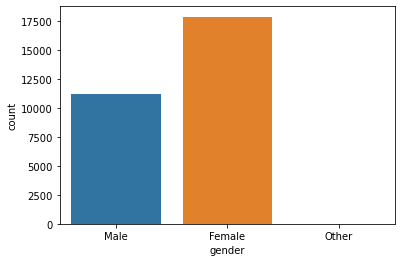

In [9]:
sns.countplot(x="gender",data=hr)
print(hr["gender"].value_counts())

0    28524
1      548
Name: stroke, dtype: int64


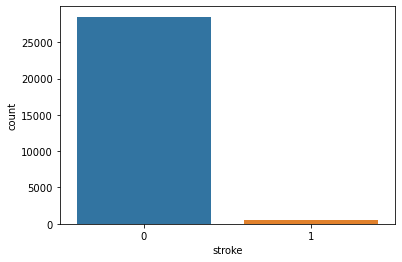

In [10]:
sns.countplot(x="stroke",data=hr)
print(hr["stroke"].value_counts())

Yes    21690
No      7382
Name: ever_married, dtype: int64


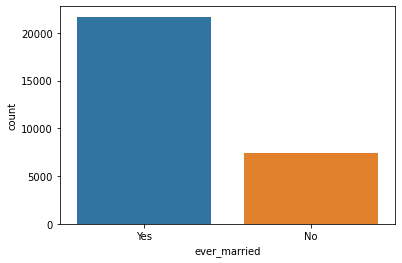

In [11]:
sns.countplot(x="ever_married",data=hr)
print(hr["ever_married"].value_counts())

Private          18954
Self-employed     5204
Govt_job          4196
children           617
Never_worked       101
Name: work_type, dtype: int64


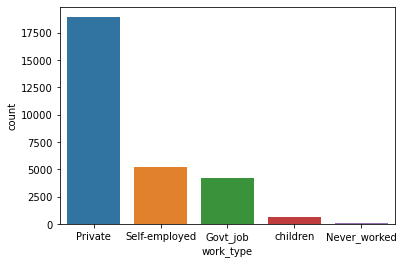

In [12]:
sns.countplot(x="work_type",data=hr)
print(hr["work_type"].value_counts())

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lb=LabelEncoder()

In [15]:
hr["gender"]=lb.fit_transform(hr["gender"])

In [16]:
hr["ever_married"]=lb.fit_transform(hr["ever_married"])

In [17]:
hr["work_type"]=lb.fit_transform(hr["work_type"])

In [18]:
hr["Residence_type"]=lb.fit_transform(hr["Residence_type"])

In [19]:
hr["smoking_status"]=lb.fit_transform(hr["smoking_status"])

In [20]:
hr.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000,29072.000000
mean,0.386179,47.671746,0.111482,0.052146,0.746079,1.929313,0.502029,106.403225,30.054166,0.969971,0.018850
std,0.487375,18.734490,0.314733,0.222326,0.435261,0.916367,0.500004,45.268512,7.193908,0.676357,0.135997
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.010000,10.100000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.627500,25.000000,1.000000,0.000000
50%,0.000000,48.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.130000,28.900000,1.000000,0.000000
75%,1.000000,62.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.910000,33.900000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,92.000000,2.000000,1.000000


In [21]:
# SD of hypertension,heart diseases is high so there are outliers , but we do not have to worry about the outliers present in
# any categorial value
#same logic goes for skewness

In [22]:
hr.skew() # -0.5 to +0.5, age, bmi, avg glucose lever are skewed, we need to remove the skewness by cbrt method

gender               0.473823
age                 -0.002612
hypertension         2.469042
heart_disease        4.029078
ever_married        -1.130797
work_type           -0.819989
Residence_type      -0.008118
avg_glucose_level    1.569766
bmi                  1.072681
smoking_status       0.036227
stroke               7.076403
dtype: float64

In [23]:
hr["age"]=np.cbrt(hr["age"])

In [24]:
hr["avg_glucose_level"]=np.cbrt(hr["avg_glucose_level"])

In [25]:
hr["bmi"]=np.cbrt(hr["bmi"])

In [26]:
minthershold,maxthershold=hr.age.quantile([0.001,0.999])
minthershold,maxthershold

(2.154434690031884, 4.344481485768612)

In [27]:
hr[hr.age<minthershold]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [28]:
hr[hr.age>maxthershold]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [29]:
# no outliers in age

In [30]:
minthershold,maxthershold=hr.avg_glucose_level.quantile([0.001,0.999])
minthershold,maxthershold

(3.805716235324846, 6.423158288562369)

In [31]:
hr[hr.avg_glucose_level<minthershold]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6964,1,3.207534,0,0,1,2,0,3.804795,2.992574,1,0
7749,1,2.154435,0,0,0,4,1,3.805026,2.970073,1,0
9404,1,2.884499,0,0,0,2,1,3.804795,3.032970,0,0
10068,0,3.708430,1,0,1,3,1,3.805256,2.793522,2,0
12015,1,2.410142,0,0,0,4,0,3.804105,2.839739,1,0
13189,0,4.140818,0,1,1,2,0,3.803874,3.292730,0,0
14935,0,4.272659,0,0,1,2,0,3.804565,3.120982,1,0
15233,0,2.466212,0,0,0,4,1,3.804105,3.036589,1,0
18041,1,2.223980,0,0,0,4,1,3.803183,3.096840,1,0
20453,0,3.271066,0,0,1,3,1,3.803874,3.061686,1,0


In [32]:
hr[hr.avg_glucose_level>maxthershold]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
976,0,3.659306,0,0,1,2,1,6.445381,3.082875,0,0
2249,0,3.914868,0,0,0,0,0,6.435979,2.943383,1,0
2885,0,4.235824,0,0,1,3,1,6.444177,3.032970,2,0
4814,1,4.235824,1,0,1,2,0,6.444097,3.124400,1,0
6170,0,4.121285,0,0,1,3,1,6.461309,3.376657,1,0
6501,0,3.732511,0,0,1,2,1,6.493643,3.936497,1,0
9268,0,3.503398,0,0,1,2,0,6.503903,3.448217,2,0
10511,0,3.936497,1,0,1,0,0,6.468008,3.373731,1,0
11007,1,3.957892,0,0,1,3,0,6.432275,3.191252,2,0
11868,1,4.081655,1,1,1,2,0,6.477158,3.144755,2,1


In [33]:
# outliers present in avg glucose level
# to treat these outliers we need to do standard scalling


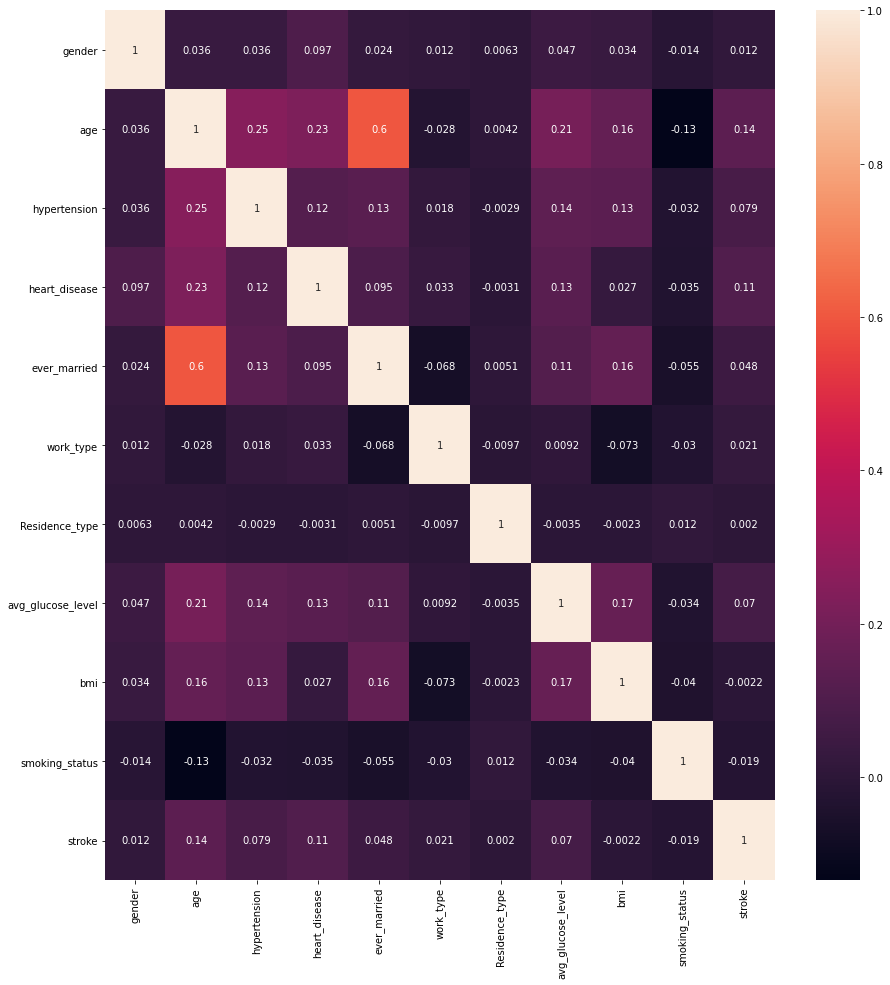

In [34]:
corr_hmap=hr.corr()
plt.figure(figsize=(15,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()# no multicollinearity present

In [35]:
x = hr.drop('stroke', axis=1).copy()

In [36]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,1,3.870877,1,0,1,2,1,4.447286,3.396999,1
3,0,4.121285,0,0,1,2,0,4.102358,3.298867,0
6,0,3.732511,0,0,1,2,1,4.265159,2.606100,0
7,0,4.217163,0,1,1,3,0,6.244785,3.000000,1
8,0,3.174802,0,0,1,2,0,4.266625,3.184693,2
...,...,...,...,...,...,...,...,...,...,...
43395,0,2.154435,0,0,0,4,1,3.885062,2.732394,1
43396,0,3.825862,0,0,1,0,1,5.977788,3.812149,0
43397,0,4.344481,1,0,1,2,1,4.513376,3.068781,0
43398,1,3.419952,0,0,1,2,1,4.628556,3.214001,1


In [37]:
y = hr['stroke'].copy()
y

1        0
3        0
6        0
7        0
8        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 29072, dtype: int64

In [38]:
#STANDARD SCALE MEAN 0 AND SD+-1 MAX MIN SCALE 0 to 1

#formula=x-mean/SD

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 1.25946389,  0.61306588,  2.82313141, ..., -0.36112531,
         1.28623465,  0.04439876],
       [-0.79237888,  1.09766352, -0.3542166 , ..., -0.94369107,
         0.8742758 , -1.43413579],
       [-0.79237888,  0.34529723, -0.3542166 , ..., -0.66872852,
        -2.03398197, -1.43413579],
       ...,
       [-0.79237888,  1.52959884,  2.82313141, ..., -0.24950313,
        -0.09163131, -1.43413579],
       [ 1.25946389, -0.25957594, -0.3542166 , ..., -0.05496991,
         0.51800597,  0.04439876],
       [-0.79237888,  1.52959884, -0.3542166 , ..., -0.61070642,
        -1.4664303 ,  0.04439876]])

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [43]:
lg=LogisticRegression()

In [44]:
lg.fit(x_train,y_train)

LogisticRegression()

In [45]:
lg.coef_

array([[ 0.01144187,  1.69968393,  0.13789462,  0.13819304, -0.13613912,
        -0.04513535,  0.02171956,  0.16173605, -0.08175654,  0.06335998]])

In [46]:
lg.intercept_

array([-5.04636456])

In [47]:
pred=lg.predict(x_test)

In [48]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
accuracy_score(y_test,pred)
#accuracy is the no of correct predictions/total no of predictions

0.9814273430782459

In [50]:
print(confusion_matrix(y_test,pred))
#it shows type 1 and type 2 error

[[5707    0]
 [ 108    0]]


In [51]:
print(classification_report(y_test,pred))
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5707
           1       0.00      0.00      0.00       108

    accuracy                           0.98      5815
   macro avg       0.49      0.50      0.50      5815
weighted avg       0.96      0.98      0.97      5815



In [52]:
lg.score(x_train,y_train)

0.9810809648707915

In [53]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [54]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [55]:
y_pred_prob

array([2.62444776e-03, 8.73862768e-02, 4.88149287e-03, ...,
       1.47595048e-03, 8.34529474e-05, 1.40759712e-02])

In [56]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [57]:
fpr
#FPR=FP/FP+TN

array([0.00000000e+00, 1.75223410e-04, 8.76117049e-04, 8.76117049e-04,
       3.85491502e-03, 3.85491502e-03, 4.20536184e-03, 4.20536184e-03,
       4.38058525e-03, 4.38058525e-03, 5.25670230e-03, 5.25670230e-03,
       7.35938321e-03, 7.35938321e-03, 8.41072367e-03, 8.41072367e-03,
       1.31417557e-02, 1.31417557e-02, 1.50692132e-02, 1.50692132e-02,
       1.89241283e-02, 1.89241283e-02, 1.96250219e-02, 1.96250219e-02,
       1.99754687e-02, 1.99754687e-02, 2.20781496e-02, 2.20781496e-02,
       2.54073944e-02, 2.54073944e-02, 2.66339583e-02, 2.66339583e-02,
       2.73348519e-02, 2.73348519e-02, 2.97879797e-02, 2.97879797e-02,
       3.38181181e-02, 3.38181181e-02, 3.39933415e-02, 3.39933415e-02,
       3.41685649e-02, 3.41685649e-02, 3.69721395e-02, 3.69721395e-02,
       3.80234799e-02, 3.80234799e-02, 3.85491502e-02, 3.85491502e-02,
       4.22288418e-02, 4.22288418e-02, 4.39810759e-02, 4.39810759e-02,
       5.37935868e-02, 5.37935868e-02, 5.39688102e-02, 5.39688102e-02,
      

In [58]:
tpr
#TPR=TP/TP+FN, FN is False negative and TP is true Positive

array([0.        , 0.        , 0.        , 0.02777778, 0.02777778,
       0.03703704, 0.03703704, 0.0462963 , 0.0462963 , 0.05555556,
       0.05555556, 0.07407407, 0.07407407, 0.08333333, 0.08333333,
       0.09259259, 0.09259259, 0.10185185, 0.10185185, 0.11111111,
       0.11111111, 0.12037037, 0.12037037, 0.12962963, 0.12962963,
       0.13888889, 0.13888889, 0.14814815, 0.14814815, 0.16666667,
       0.16666667, 0.18518519, 0.18518519, 0.19444444, 0.19444444,
       0.2037037 , 0.2037037 , 0.21296296, 0.21296296, 0.22222222,
       0.22222222, 0.23148148, 0.23148148, 0.25      , 0.25      ,
       0.25925926, 0.25925926, 0.26851852, 0.26851852, 0.27777778,
       0.27777778, 0.28703704, 0.28703704, 0.2962963 , 0.2962963 ,
       0.30555556, 0.30555556, 0.31481481, 0.31481481, 0.32407407,
       0.32407407, 0.33333333, 0.33333333, 0.34259259, 0.34259259,
       0.35185185, 0.35185185, 0.36111111, 0.36111111, 0.37037037,
       0.37037037, 0.37962963, 0.37962963, 0.38888889, 0.38888

In [59]:
thersholds

array([1.28389938e+00, 2.83899376e-01, 2.42698040e-01, 1.91967353e-01,
       1.61427765e-01, 1.55010817e-01, 1.53105255e-01, 1.52281269e-01,
       1.52261149e-01, 1.52207616e-01, 1.49744028e-01, 1.45171430e-01,
       1.34137854e-01, 1.33841599e-01, 1.29619368e-01, 1.29298761e-01,
       1.17961252e-01, 1.17822870e-01, 1.12946258e-01, 1.12935313e-01,
       1.07028791e-01, 1.06912783e-01, 1.04892481e-01, 1.04463677e-01,
       1.03767930e-01, 1.03660639e-01, 1.00876461e-01, 1.00698843e-01,
       9.65762693e-02, 9.64119906e-02, 9.46815568e-02, 9.44387212e-02,
       9.37651312e-02, 9.36970444e-02, 9.07713573e-02, 9.06799582e-02,
       8.79365344e-02, 8.79337882e-02, 8.78968100e-02, 8.76594999e-02,
       8.76391591e-02, 8.75921368e-02, 8.47256802e-02, 8.42940802e-02,
       8.35782183e-02, 8.34314427e-02, 8.27796105e-02, 8.24075678e-02,
       7.93864989e-02, 7.93747583e-02, 7.87912100e-02, 7.84546658e-02,
       7.28680192e-02, 7.28181423e-02, 7.27865401e-02, 7.23668970e-02,
      

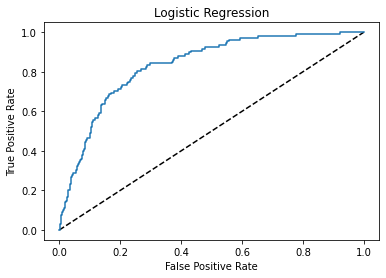

In [60]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [61]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [62]:
auc_score

0.5

In [63]:
from sklearn.neighbors import KNeighborsClassifier


In [64]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
predknn=knn.predict(x_test)
predknn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
accuracy_score(y_test,predknn)

0.9812553740326742

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc=DecisionTreeClassifier(criterion="gini")

In [69]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
 preddtc=dtc.predict(x_test)

In [71]:
accuracy_score(y_test,preddtc)

0.9582115219260533

In [72]:
from sklearn.svm import SVC

In [73]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)

SVC()

In [74]:
predictsvc=sv.predict(x_test)

In [75]:
predictsvc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
accuracy_score(y_test,predictsvc)

0.9814273430782459

In [ ]:
# So SVC, Logit, KNN have same accuracy rate. So these three models are best fit to predict heart stroke.